In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_train = pd.read_csv('titanic/train.csv')
titanic_test = pd.read_csv('titanic/test.csv')
titanic_train
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
x_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train.Survived

# x_test = titanic_test.drop('Survived', axis=1)
# y_test = titanic_test.Survived

In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
# titanic_test['Survived'].value_counts()

In [8]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
titanic_test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [10]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
titanic_test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [12]:
# Siblings/Spouse
titanic_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
titanic_test['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [14]:
# Parents/Children
titanic_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [15]:
titanic_test['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [16]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
titanic_test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [18]:
print(titanic_train['Cabin'].unique())
print()
print(titanic_train['Cabin'].isnull().sum())
print()
print(titanic_train['Cabin'].notnull().sum())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

687

204


In [19]:
print(f'Total amount of fare collected: {titanic_train.Fare.sum()}')
print()
print(f'Average fare collected: {titanic_train.Fare.mean()}')
print()
print(f'Highest fare collected: {titanic_train.Fare.max()}')
print()
print(f'Lowest fare collected: {titanic_train.Fare.min()}')

Total amount of fare collected: 28693.9493

Average fare collected: 32.2042079685746

Highest fare collected: 512.3292

Lowest fare collected: 0.0


In [20]:
print(f'Total amount of fare collected: {titanic_test.Fare.sum()}')
print()
print(f'Average fare collected: {titanic_test.Fare.mean()}')
print()
print(f'Highest fare collected: {titanic_test.Fare.max()}')
print()
print(f'Lowest fare collected: {titanic_test.Fare.min()}')

Total amount of fare collected: 14856.5376

Average fare collected: 35.6271884892086

Highest fare collected: 512.3292

Lowest fare collected: 0.0


In [21]:
print(f'Average age of passengers: {titanic_train.Age.mean()}')
print()
print(f'Oldest passenger: {titanic_train.Age.max()}')
print()
print(f'Youngest passenger: {titanic_train.Age.min()}')

Average age of passengers: 29.69911764705882

Oldest passenger: 80.0

Youngest passenger: 0.42


In [22]:
print(f'Average age of passengers: {titanic_test.Age.mean()}')
print()
print(f'Oldest passenger: {titanic_test.Age.max()}')
print()
print(f'Youngest passenger: {titanic_test.Age.min()}')

Average age of passengers: 30.272590361445783

Oldest passenger: 76.0

Youngest passenger: 0.17


In [23]:
# def fill_ages(age):
#     if titanic_train['Sex'] == 'male':
#         return 30.7
#     else:
#         return 27.9
    
# titanic_train['Age']=titanic_train['Age'].apply(fill_ages)
# list(titanic_train['Age'])

titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
x = titanic_train[titanic_train['Age'].isnull()]
x['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [25]:
x = titanic_test[titanic_test['Age'].isnull()]
x['Sex'].value_counts()

male      61
female    25
Name: Sex, dtype: int64

In [26]:
x = titanic_train[titanic_train['Age'].notnull()]
male = x[x['Sex'] == 'male']
female = x[x['Sex'] == 'female']
print(f'Average age of male passengers: {male.Age.mean()}')
print()
print(f'Average age of female passengers: {female.Age.mean()}')

Average age of male passengers: 30.72664459161148

Average age of female passengers: 27.915708812260537


In [27]:
x = titanic_test[titanic_test['Age'].notnull()]
male = x[x['Sex'] == 'male']
female = x[x['Sex'] == 'female']
print(f'Average age of male passengers: {male.Age.mean()}')
print()
print(f'Average age of female passengers: {female.Age.mean()}')

Average age of male passengers: 30.27273170731707

Average age of female passengers: 30.27236220472441


In [28]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


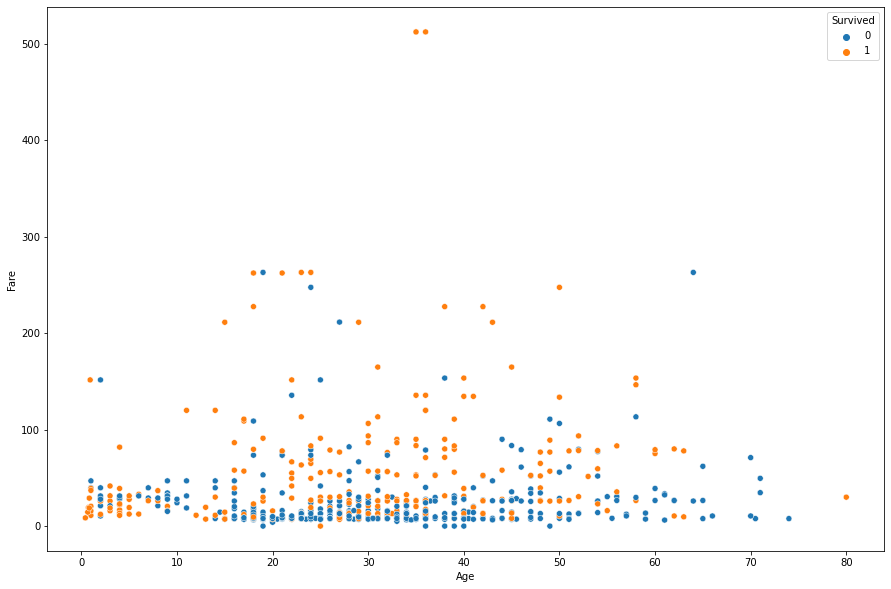

In [29]:
plt.figure(figsize=[15,10])
sns.scatterplot(data=titanic_train, x='Age', y='Fare', hue='Survived')
plt.show()

In [30]:
from sklearn.impute import SimpleImputer



In [31]:
x_train.loc[x_train['Sex'] == 'male', ['Age']] = x_train.loc[:, ['Age']].fillna(30.7)
x_train.loc[x_train['Sex'] == 'female', ['Age']] = x_train.loc[:, ['Age']].fillna(27.9)

titanic_test.loc[titanic_test['Sex'] == 'male', ['Age']] = titanic_test.loc[:, ['Age']].fillna(30.2)
titanic_test.loc[titanic_test['Sex'] == 'female', ['Age']] = titanic_test.loc[:, ['Age']].fillna(30.2)

x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [32]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
# with pd.option_context("display.max_rows", None):
#     display(fare_dup)

In [34]:
x_train['Embarked'] = x_train['Embarked'].fillna('S')
titanic_test['Embarked'] = titanic_test['Embarked'].fillna('S')
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [35]:
fare_dup = titanic_train[titanic_train['Ticket'].duplicated(keep=False)]
fare_dup
# fare_dup[fare_dup['Ticket'] ==]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [36]:
ticket=input()

titanic_train[(titanic_train['Ticket'].str.lower()).str.contains(ticket.lower())]

657


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [37]:
x_train = x_train.drop(columns=['Name', 'Cabin', 'Ticket'], axis=1)
titanic_test = titanic_test.drop(columns=['Name', 'Cabin', 'Ticket'], axis=1)
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,27.9,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [38]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [39]:
x_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S
887,888,1,female,19.0,0,0,30.0000,S
888,889,3,female,27.9,1,2,23.4500,S
889,890,1,male,26.0,0,0,30.0000,C


In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe = OneHotEncoder()

In [42]:
titanic_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,30.2,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,30.2,0,0,8.0500,S


In [43]:
x_train = pd.get_dummies(x_train, columns=['Sex', 'Embarked'])
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'])
x_train
titanic_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.2,0,0,8.0500,0,1,0,0,1
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1
416,1308,3,30.2,0,0,8.0500,0,1,0,0,1


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

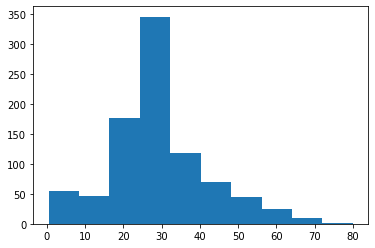

In [44]:
plt.figure()
plt.hist(x_train['Age'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

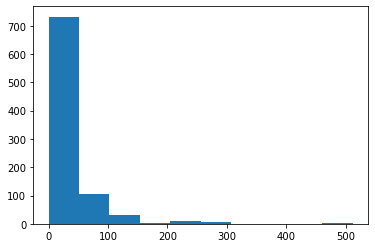

In [45]:
plt.figure()
plt.hist(x_train['Fare'])

In [46]:
x_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,3,27.9,1,2,23.4500,1,0,0,0,1
889,890,1,26.0,0,0,30.0000,0,1,1,0,0


In [47]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_female   891 non-null    uint8  
 7   Sex_male     891 non-null    uint8  
 8   Embarked_C   891 non-null    uint8  
 9   Embarked_Q   891 non-null    uint8  
 10  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [52]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Sex_female   418 non-null    uint8  
 7   Sex_male     418 non-null    uint8  
 8   Embarked_C   418 non-null    uint8  
 9   Embarked_Q   418 non-null    uint8  
 10  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 21.8 KB


In [55]:
mean_fare = titanic_test['Fare'].mean()
titanic_test['Fare'] = titanic_test['Fare'].fillna(mean_fare)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

train_scores = []
test_scores = []


for key, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    train_score = round(classifier.score(x_train, y_train), 2)
    train_scores.append(train_score)
    
    
print(train_scores)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.8, 0.75, 0.66, 1.0, 1.0]


In [49]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
DecisionTree.score(x_train,y_train)

1.0

In [56]:
survived_test = DecisionTree.predict(titanic_test)
survived_test

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
titanic_test['Survived'] = survived_test

In [58]:
titanic_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.2,0,0,8.0500,0,1,0,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,1,0,0,1
415,1307,3,38.5,0,0,7.2500,0,1,0,0,1,0
416,1308,3,30.2,0,0,8.0500,0,1,0,0,1,0


In [60]:
kaggle_comp = titanic_test[['PassengerId', 'Survived']]
kaggle_comp

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
kaggle_comp.to_csv('titanic/titanic_predictions.csv')